In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import pearsonr

### Open dataset

In [3]:
file = "UCI_Credit_Card.csv"
cc_df = pd.read_csv(file)
cc_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


#### Dataset summary

In [5]:
cc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [6]:
cc_df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [7]:
cc_df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [8]:
categorical_cols = ['SEX','EDUCATION','MARRIAGE','AGE','PAY_0','PAY_2','PAY_3',
'PAY_4','PAY_5','PAY_6','default.payment.next.month']
numerical_cols = cc_df.drop(['ID','SEX','EDUCATION','MARRIAGE','PAY_0','PAY_2',
'PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'], axis=1)

In [9]:
print('Describing numerical columns')
print(cc_df[numerical_cols.columns].describe())

Describing numerical columns
            LIMIT_BAL           AGE      BILL_AMT1      BILL_AMT2  \
count    30000.000000  30000.000000   30000.000000   30000.000000   
mean    167484.322667     35.485500   51223.330900   49179.075167   
std     129747.661567      9.217904   73635.860576   71173.768783   
min      10000.000000     21.000000 -165580.000000  -69777.000000   
25%      50000.000000     28.000000    3558.750000    2984.750000   
50%     140000.000000     34.000000   22381.500000   21200.000000   
75%     240000.000000     41.000000   67091.000000   64006.250000   
max    1000000.000000     79.000000  964511.000000  983931.000000   

          BILL_AMT3      BILL_AMT4      BILL_AMT5      BILL_AMT6  \
count  3.000000e+04   30000.000000   30000.000000   30000.000000   
mean   4.701315e+04   43262.948967   40311.400967   38871.760400   
std    6.934939e+04   64332.856134   60797.155770   59554.107537   
min   -1.572640e+05 -170000.000000  -81334.000000 -339603.000000   
25%    2.

#### Analyze categorical variables

In [10]:
target = cc_df['SEX'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=18112, Percentage=60.373%
Class=1, Count=11888, Percentage=39.627%


In [11]:
target = cc_df['EDUCATION'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=14030, Percentage=46.767%
Class=1, Count=10585, Percentage=35.283%
Class=3, Count=4917, Percentage=16.390%
Class=5, Count=280, Percentage=0.933%
Class=4, Count=123, Percentage=0.410%
Class=6, Count=51, Percentage=0.170%
Class=0, Count=14, Percentage=0.047%


In [12]:
target = cc_df['MARRIAGE'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=13659, Percentage=45.530%
Class=2, Count=15964, Percentage=53.213%
Class=3, Count=323, Percentage=1.077%
Class=0, Count=54, Percentage=0.180%


In [13]:
target = cc_df['PAY_0'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=2, Count=2667, Percentage=8.890%
Class=-1, Count=5686, Percentage=18.953%
Class=0, Count=14737, Percentage=49.123%
Class=-2, Count=2759, Percentage=9.197%
Class=1, Count=3688, Percentage=12.293%
Class=3, Count=322, Percentage=1.073%
Class=4, Count=76, Percentage=0.253%
Class=8, Count=19, Percentage=0.063%
Class=7, Count=9, Percentage=0.030%
Class=5, Count=26, Percentage=0.087%
Class=6, Count=11, Percentage=0.037%


In [14]:
target = cc_df['default.payment.next.month'].values
counter = Counter(target)
for k,v in counter.items():
    per = v / len(target) * 100
    print('Class=%d, Count=%d, Percentage=%.3f%%' % (k, v, per))

Class=1, Count=6636, Percentage=22.120%
Class=0, Count=23364, Percentage=77.880%


### Data cleaning

In [15]:
# Column ID is no needed
cc_df = cc_df.drop(axis=1, columns='ID')

In [16]:
# Rename column PAY_0 to PAY_1
#   BILL_AMT and PAY_AMT
cc_df = cc_df.rename(columns={'PAY_0': 'PAY_1'})

In [17]:
# Rename column default.payment.next.month to payment
cc_df = cc_df.rename(columns={'default.payment.next.month': 'default'})
print(f'Column names are :', list(cc_df.columns))

Column names are : ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default']


In [18]:
# From Data Description, that in column EDUCATION, 5 and 6 represents "unknown"
#   Changing 6 to 5 to keep it under 1 category
cc_df['EDUCATION'] = cc_df['EDUCATION'].replace(6,5)
print(f'Unique values of Education columns are:',np.unique(cc_df['EDUCATION']))

Unique values of Education columns are: [0 1 2 3 4 5]


### Graphical analysis

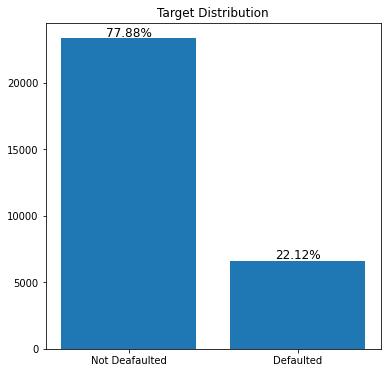

In [19]:
# Percentage of people who have Defaulted and not defaulted
target_count = cc_df.groupby('default').size().reset_index(name='counts')

plt.figure(figsize=(6,6))
plt.bar(target_count['default'], target_count.counts)
plt.xticks([0,1], labels=["Not Deafaulted", "Defaulted"])
plt.title("Target Distribution")

total = len(cc_df['default'])
not_def = len(cc_df[cc_df['default']==0])/total *100
yes_def = len(cc_df[cc_df['default']==1])/total *100

plt.text(x=0, y=not_def,s=str("%.2f"%not_def+'%'), fontsize=12, position=(0,len(cc_df[cc_df['default']==0])*1.006), horizontalalignment='center')
plt.text(x=1, y=yes_def,s=str("%.2f"%yes_def+'%'), fontsize=12, position=(1,len(cc_df[cc_df['default']==1])*1.02), horizontalalignment='center')

plt.show()

#### Analysis of categorical values

<Figure size 432x432 with 0 Axes>

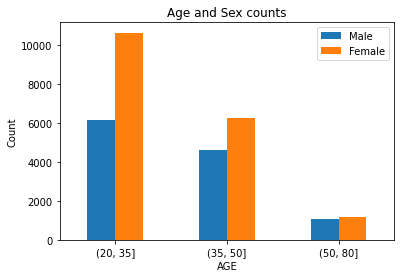

In [20]:
cc_df['AGE'] = pd.cut(cc_df.AGE, bins=[20,35,50,80])

target_count = cc_df.groupby(['AGE','SEX']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Male', 'Female'])
plt.title("Age and Sex counts")
plt.show()

<Figure size 432x432 with 0 Axes>

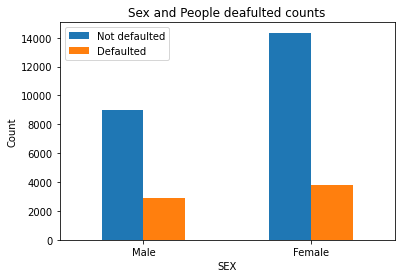

In [21]:
target_count = cc_df.groupby(['SEX','default']).SEX.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=False)
plt.xticks([0,1],labels=['Male','Female'],rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Sex and People deafulted counts")
plt.show()

<Figure size 432x432 with 0 Axes>

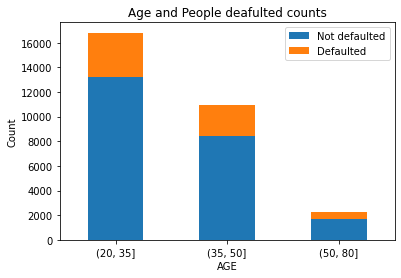

In [24]:
target_count = cc_df.groupby(['AGE','default']).AGE.count().unstack()

# print(target_count)
plt.figure(figsize=(6,6))
target_count.plot(kind='bar', stacked=True)
plt.xticks(rotation=0)
plt.ylabel('Count')
plt.legend(['Not defaulted', 'Defaulted'])
plt.title("Age and People deafulted counts")
plt.show()

#### Analysis of numerical variables

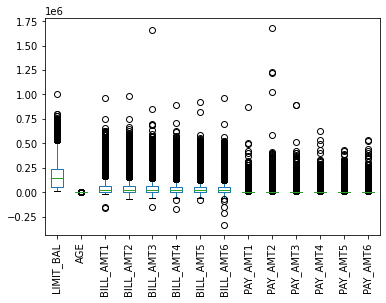

In [22]:
numerical_cols.plot(kind='box')
plt.figsize=(20,10)
plt.xticks(rotation=90)
plt.show()

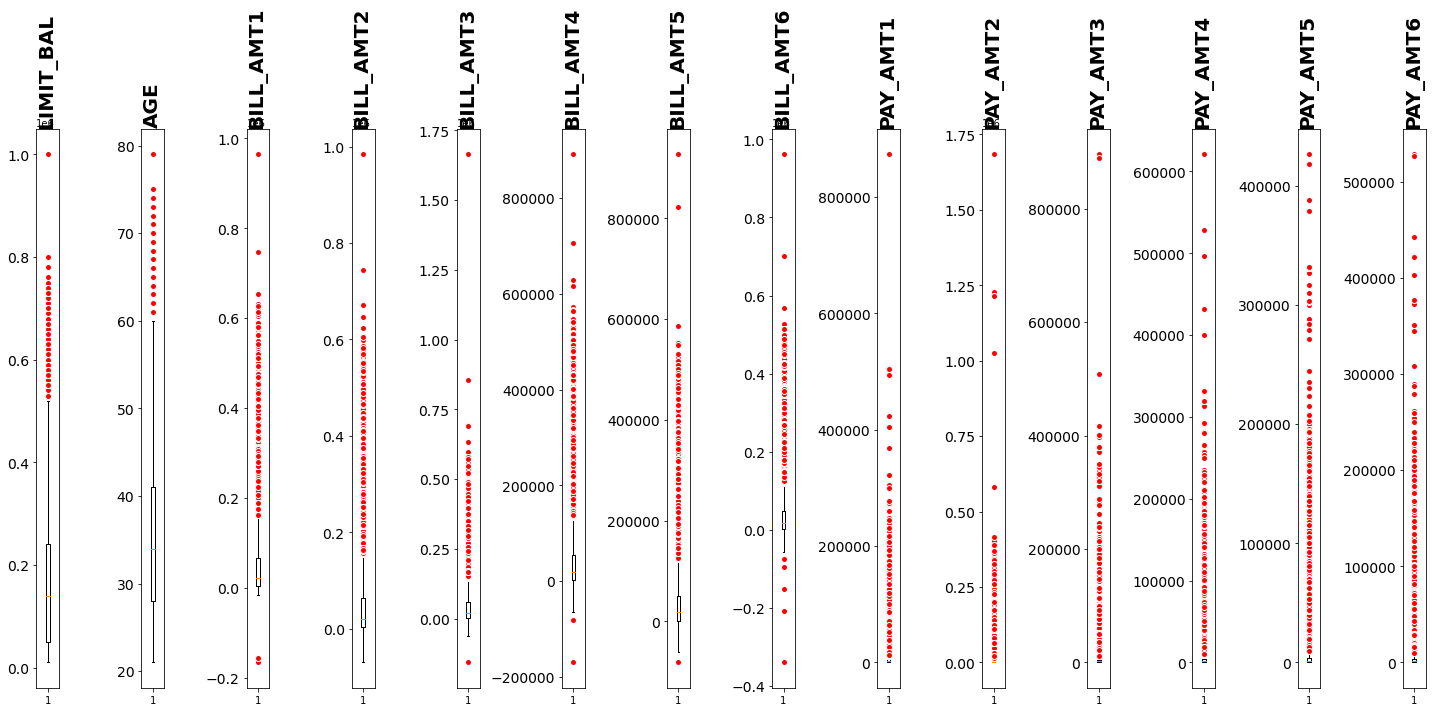

In [23]:
red_circle = dict(markerfacecolor='red', marker='o', markeredgecolor='white')

fig, axs = plt.subplots(1, len(numerical_cols.columns), figsize=(20,10))

for i, ax in enumerate(axs.flat):
    ax.boxplot(numerical_cols.iloc[:,i], flierprops=red_circle)
    ax.set_title(numerical_cols.columns[i], rotation=90, fontsize=20, fontweight='bold')
    ax.tick_params(axis='y', labelsize=14)
plt.tight_layout()

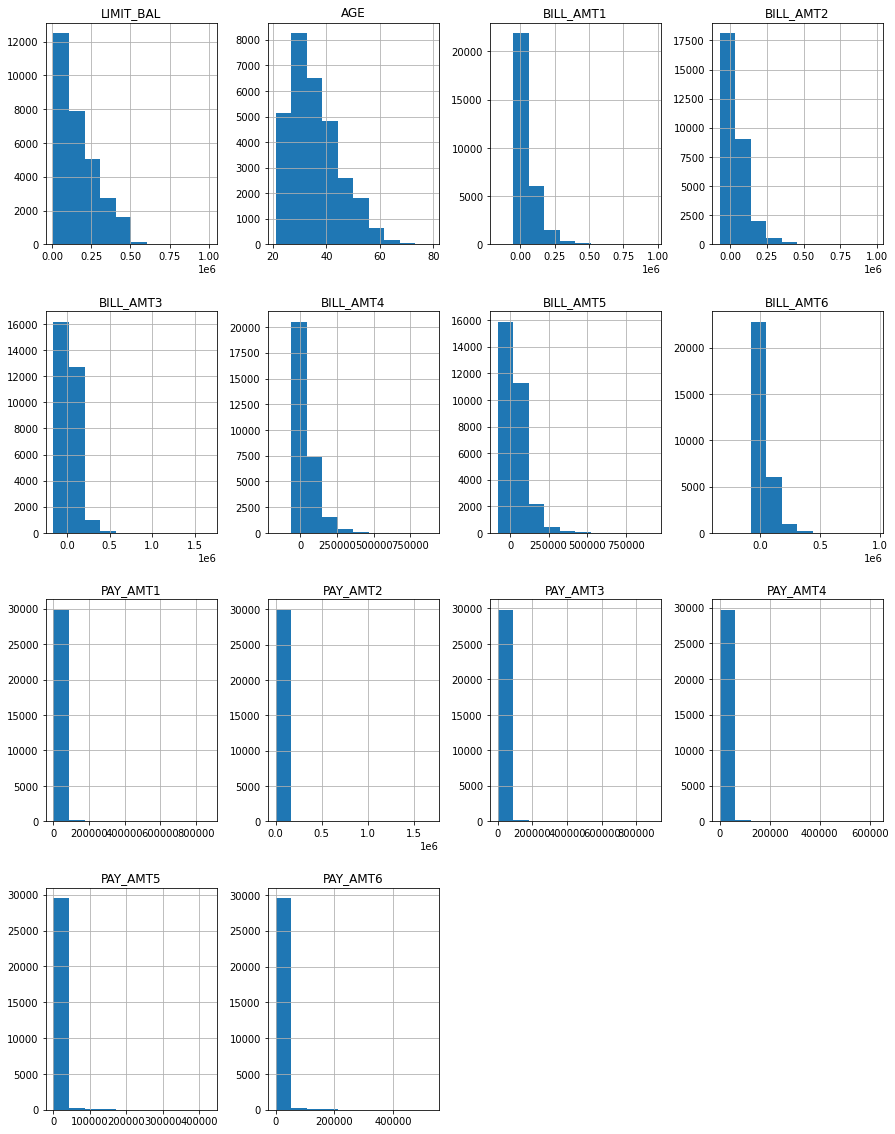

In [25]:
numerical_cols.hist(figsize = (15,20))
plt.show()

/home/suelo/Desktop/env/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


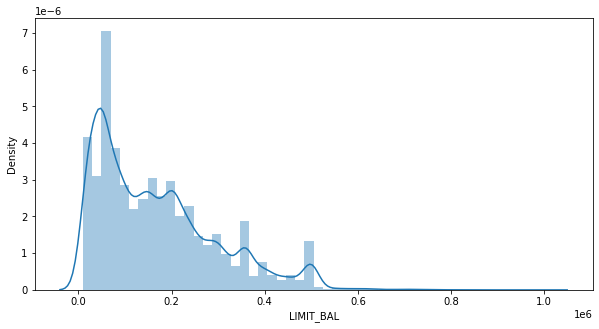

In [66]:
plt.subplots(figsize=(10,5))
# plt.subplot(121)
sns.distplot(cc_df.LIMIT_BAL)
plt.show()

#### Correlation matrix

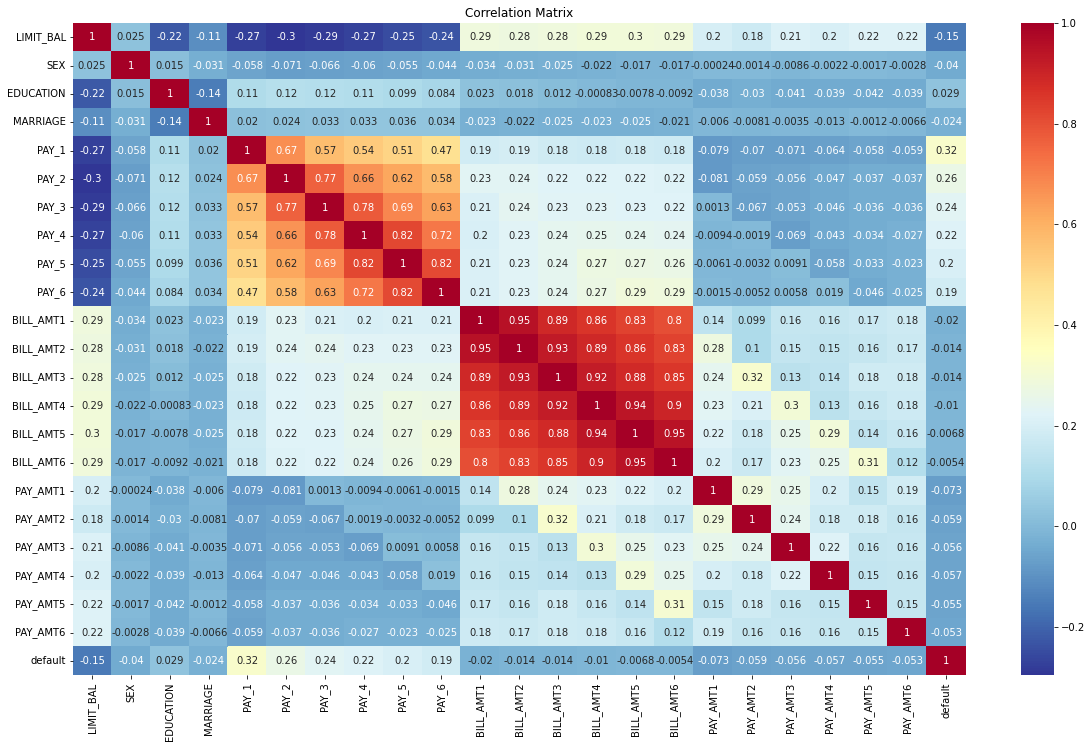

In [26]:
corr_mat = cc_df.corr()
plt.figure(figsize = [20,12])
sns.heatmap(corr_mat, annot = True, cmap = 'RdYlBu_r')
plt.title('Correlation Matrix')
plt.show()

<AxesSubplot:xlabel='MARRIAGE', ylabel='LIMIT_BAL'>

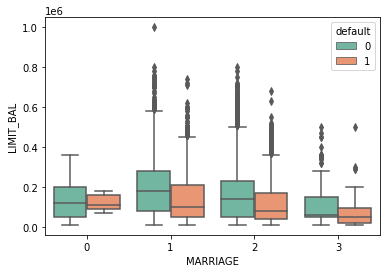

In [30]:
sns.boxplot(x= cc_df['MARRIAGE'],
            y = cc_df['LIMIT_BAL'],
            hue = cc_df['default'],
            palette = 'Set2')

<AxesSubplot:xlabel='SEX', ylabel='LIMIT_BAL'>

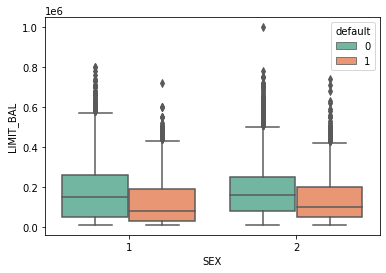

In [40]:
sns.boxplot(x= cc_df['SEX'],
            y = cc_df['LIMIT_BAL'],
            hue = cc_df['default'],
            palette = 'Set2')

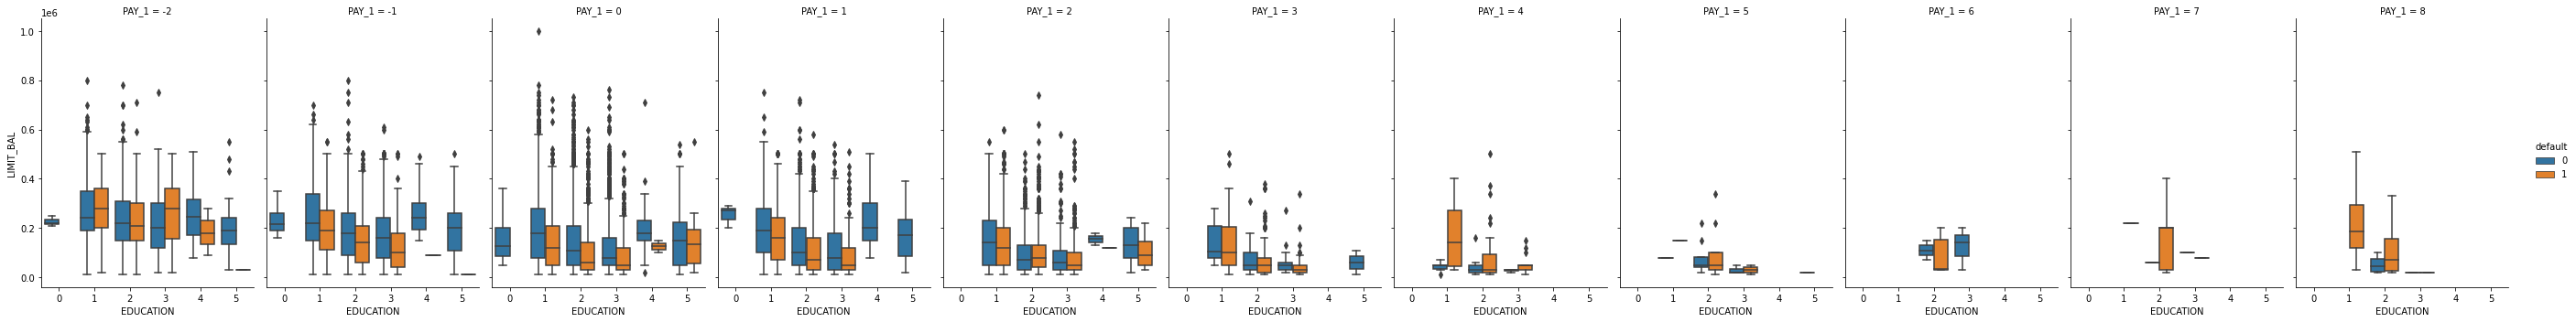

In [61]:
sns.catplot(x='EDUCATION', y='LIMIT_BAL',
            hue ='default', col ='PAY_1',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

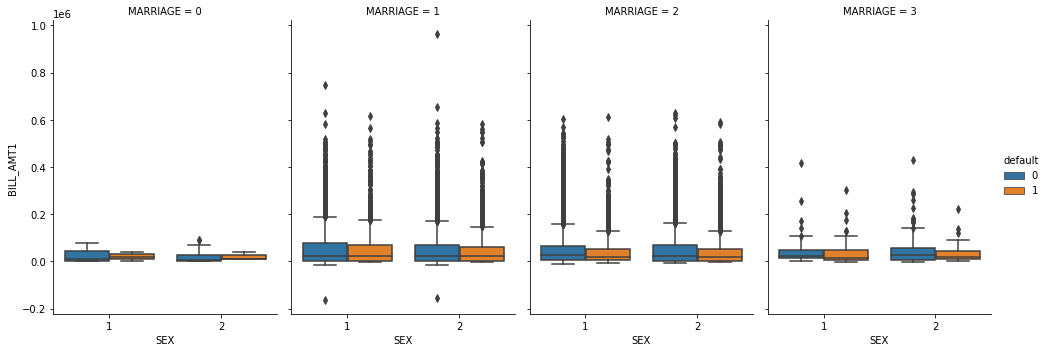

In [60]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default', col ='MARRIAGE',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

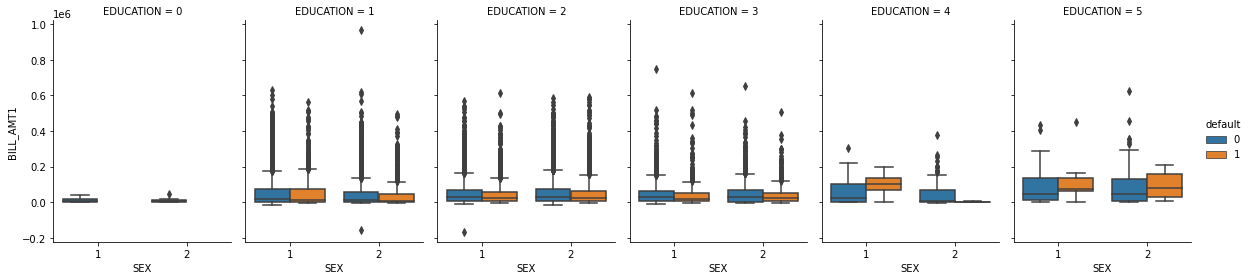

In [53]:
sns.catplot(x='SEX', y='BILL_AMT1',
            hue ='default', col ='EDUCATION',
            data=cc_df, kind="box",
            height=4, aspect=0.7)

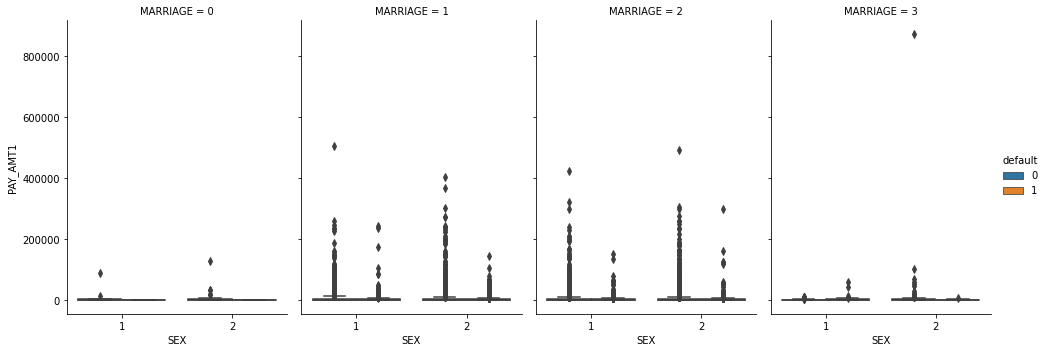

In [65]:
sns.catplot(x='SEX', y='PAY_AMT1',
            hue ='default', col ='MARRIAGE',
            data=cc_df, kind="box",
            height=5, aspect=0.7)

KeyboardInterrupt: 

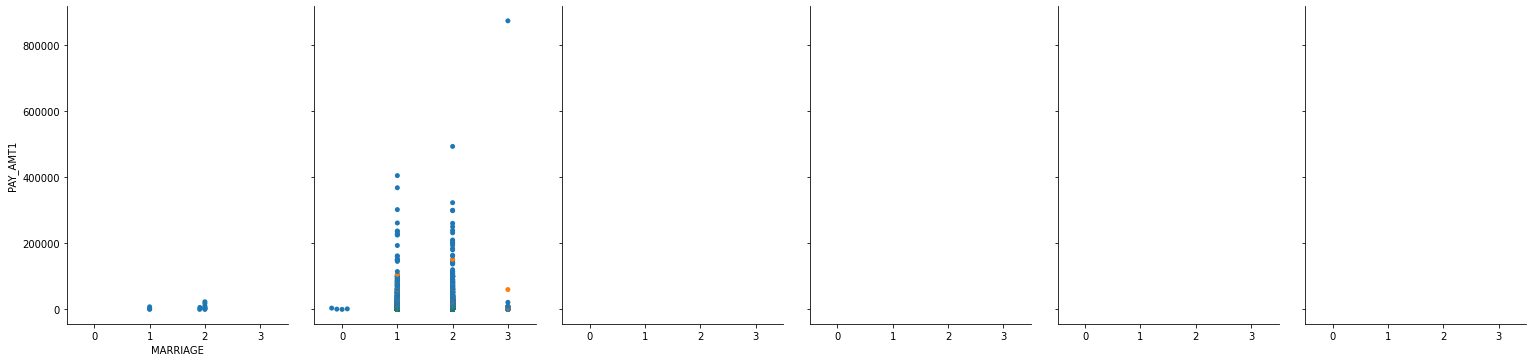

In [62]:
sns.catplot(x='MARRIAGE', y='PAY_AMT1',
            hue ='default', col ='EDUCATION',
            data=cc_df, kind="swarm",
            height=5, aspect=0.7)